In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
train_dir = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train"
train_defog = os.path.join(train_dir, "defog")
train_tdcsfog = os.path.join(train_dir, "tdcsfog")
train_notype = os.path.join(train_dir, "notype")

## `events.csv`
This file is common for all series

In [3]:
events = pd.read_csv("/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/events.csv")
events

,Id,Init,Completion,Type,Kinetic
0,003f117e14,8.61312,14.7731,Turn,1.0
1,009ee11563,11.38470,41.1847,Turn,1.0
2,009ee11563,54.66470,58.7847,Turn,1.0
3,011322847a,28.09660,30.2966,Turn,1.0
4,01d0fe7266,30.31840,31.8784,Turn,1.0
...,...,...,...,...,...
3539,f9fc61ce85,620.74000,623.8450,Walking,0.0
3540,f9fc61ce85,774.67800,774.8330,Walking,1.0
3541,f9fc61ce85,924.11900,925.6270,Turn,1.0
3542,f9fc61ce85,983.03900,984.0380,Turn,0.0


In [4]:
def get_event_details(_id):
    return events[events["Id"] == _id]

## Understanding `defog`
Sampling rate is 100 Hz

In [5]:
_id = "02ea782681"
sample_defog = pd.read_csv(os.path.join(train_defog, _id + ".csv"))
sample_defog

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
0,0,-1.000000,0.044129,-0.250000,0,0,0,False,False
1,1,-1.000000,0.034431,-0.250000,0,0,0,False,False
2,2,-1.000000,0.031250,-0.250000,0,0,0,False,False
3,3,-1.000000,0.031250,-0.250000,0,0,0,False,False
4,4,-1.000000,0.031250,-0.250000,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...
162902,162902,-1.007283,0.234375,-0.375000,0,0,0,False,False
162903,162903,-1.000000,0.234375,-0.369159,0,0,0,False,False
162904,162904,-0.994626,0.234375,-0.351954,0,0,0,False,False
162905,162905,-0.977308,0.234375,-0.336683,0,0,0,False,False


### Correlating with `events.csv`

In [6]:
event_details = get_event_details(_id)
event_details

,Id,Init,Completion,Type,Kinetic
1212,02ea782681,1377.175,1378.089,Turn,1.0
1213,02ea782681,1466.410,1466.788,Turn,1.0


Above shows that the Turn event occurred at 1377.175s. This corresponds to the 137717.5th timestep. Check in the corresponding defog file

In [7]:
sample_defog.iloc[137717:137808]

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
137717,137717,-0.870723,-0.026373,-0.315984,0,0,0,True,True
137718,137718,-0.842959,-0.057826,-0.364557,0,1,0,True,True
137719,137719,-0.798166,-0.076608,-0.394804,0,1,0,True,True
137720,137720,-0.828259,-0.053303,-0.531326,0,1,0,True,True
137721,137721,-0.980579,-0.011160,-0.614948,0,1,0,True,True
...,...,...,...,...,...,...,...,...,...
137803,137803,-0.877286,0.232563,-0.428733,0,1,0,True,True
137804,137804,-0.895658,0.209503,-0.394485,0,1,0,True,True
137805,137805,-0.906250,0.160317,-0.351081,0,1,0,True,True
137806,137806,-0.906250,0.112736,-0.318029,0,1,0,True,True


### `defog_metadata.csv`

In [8]:
defog_metadata = pd.read_csv("/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/defog_metadata.csv")
defog_metadata[defog_metadata["Id"] == _id]

,Id,Subject,Visit,Medication
1,02ea782681,ae2d35,2,on


### `notype.csv`

In [9]:
no_type = pd.read_csv(os.path.join(train_dir, "notype", "02ab235146" + ".csv"))
no_type

,Time,AccV,AccML,AccAP,Event,Valid,Task
0,0,-0.914652,-0.300851,0.298156,0,False,False
1,1,-0.914367,-0.301572,0.298325,0,False,False
2,2,-0.779540,-0.343197,0.275690,0,False,False
3,3,-0.993162,-0.270281,0.315775,0,False,False
4,4,-0.948767,-0.307849,0.297191,0,False,False
...,...,...,...,...,...,...,...
281683,281683,-0.899299,-0.232668,0.389147,0,False,False
281684,281684,-0.901973,-0.233051,0.390114,0,False,False
281685,281685,-0.901690,-0.231888,0.391896,0,False,False
281686,281686,-0.899576,-0.232429,0.391106,0,False,False


### `subjects.csv`

In [10]:
subs = pd.read_csv("/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/subjects.csv")
subs[subs["Subject"] == "ae2d35"]

,Subject,Visit,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
128,ae2d35,1.0,67,M,7.0,15.0,48.0,23
129,ae2d35,2.0,67,M,7.0,14.0,57.0,19


### `tasks.csv`

In [11]:
task = pd.read_csv("/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/tasks.csv")
task[task["Id"] == _id]

,Id,Begin,End,Task
35,02ea782681,10.000,21.618,4MW
36,02ea782681,99.404,111.200,4MW-C
37,02ea782681,174.440,177.909,MB1
38,02ea782681,202.020,209.735,MB2b
39,02ea782681,243.977,266.828,MB3-L
40,02ea782681,291.882,314.466,MB3-R
41,02ea782681,341.990,348.543,MB4
42,02ea782681,358.967,367.886,MB5
43,02ea782681,381.251,390.695,MB6-R
44,02ea782681,404.743,409.869,MB6-L


### Unlabeled

In [42]:
pd.read_parquet("/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/unlabeled/00c4c9313d.parquet")

,Time,AccV,AccML,AccAP
0,0,0.328125,-0.109375,0.671875
1,1,0.453108,-0.124721,0.811273
2,2,0.423042,-0.264046,0.921238
3,3,0.150015,-0.310241,0.937483
4,4,-0.202003,-0.545908,0.890842
...,...,...,...,...
69722384,69722384,-0.250000,-0.093750,-1.000000
69722385,69722385,-0.234375,-0.093750,-1.000000
69722386,69722386,-0.250000,-0.093750,-1.000000
69722387,69722387,-0.250000,-0.093750,-1.000000


## Plots

In [12]:
import matplotlib.pyplot as plt

In [13]:
def get_fog_timesteps(id, freq):
    timesteps = [[], [], []]
    e = get_event_details(id)
    for i, row in e.iterrows():
        if row['Type'] == 'StartHesitation':
            timesteps[0].append(row['Init'] * freq)
            timesteps[0].append(row['Completion'] * freq)
        elif row['Type'] == 'Turn':
            timesteps[1].append(row['Init'] * freq)
            timesteps[1].append(row['Completion'] * freq)
        else:
            timesteps[2].append(row['Init'] * freq)
            timesteps[2].append(row['Completion'] * freq)
    return timesteps

In [15]:
def make_plot(ids, sub, freq):
    plt.figure(figsize=(20, 20))
    for _ in range(4):
        sample = pd.read_csv(os.path.join(train_dir, sub, (ids[_] + '.csv')))
        plt.subplot(2, 2, _ + 1)
        plt.plot(sample['Time'], sample['AccV'])
        plt.plot(sample['Time'], sample['AccML'])
        plt.plot(sample['Time'], sample['AccAP'])
        plt.legend(['AccV', 'AccML', 'AccAP'])
        timesteps = get_fog_timesteps(ids[_], freq)
        for i in range(len(timesteps)):
            for t in timesteps[i]:
                if i == 0:  # StartHesitation
                    plt.axvline(t, color='b')
                elif i == 1:  # Turn
                    plt.axvline(t, color='g')
                else:  # Walking
                    plt.axvline(t, color='r')
#     plt.show()

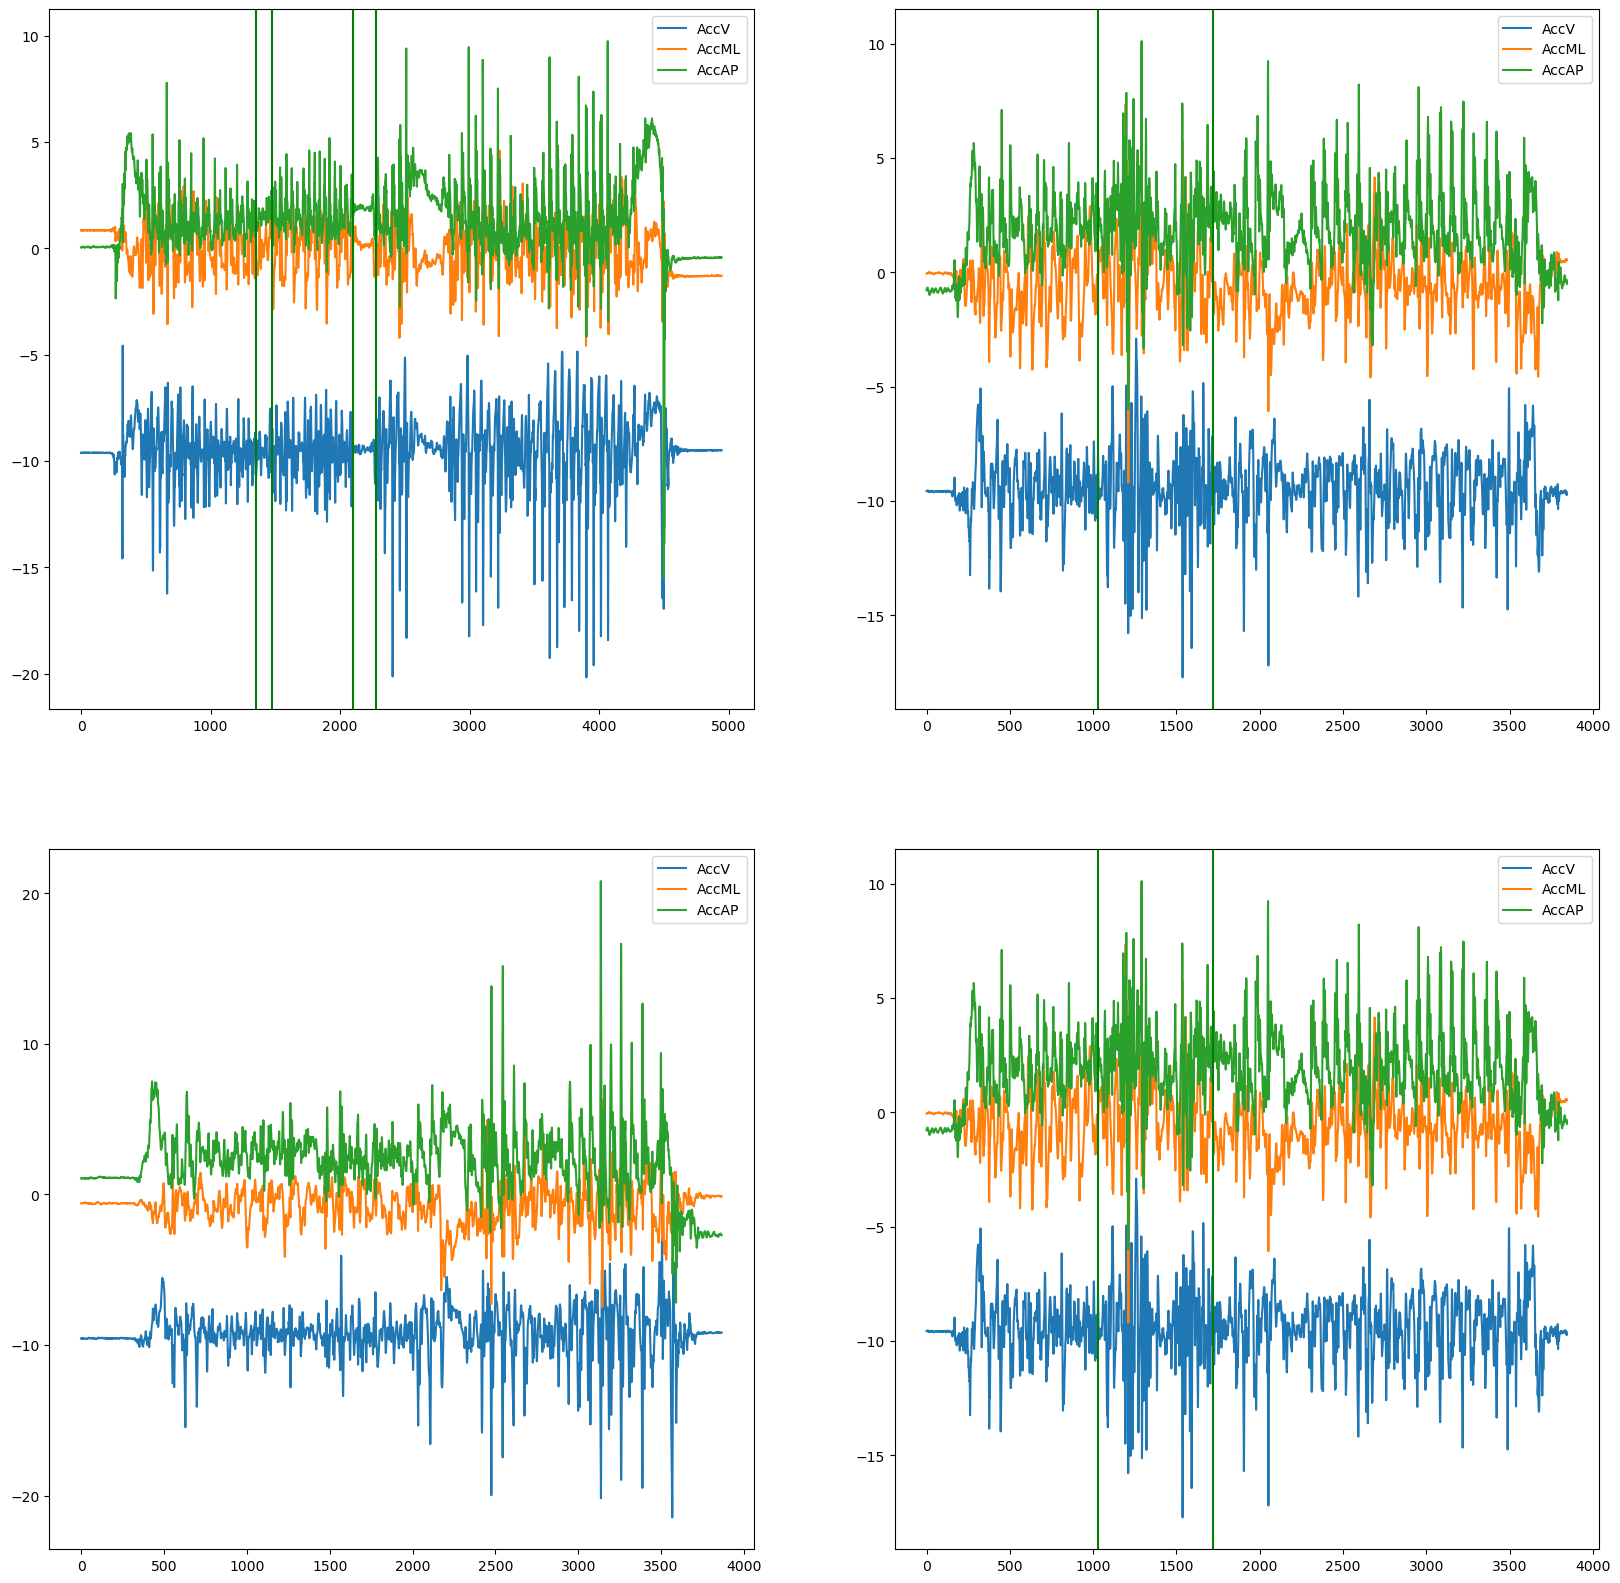

In [17]:
ids = [
    '08d6702e8a',
    '10efee36af',
    '04c2e97800',
    '10efee36af',
]
make_plot(ids, 'tdcsfog', 128)
# blue vertical lines denote the period of StartHesitation FOG
# green vertical lines denote the period of Turn FOG
# red vertical lines denote the period of Walking FOG